In [204]:
import fiona
import pandas as pd
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
plt.rcParams['axes.unicode_minus']=False#负号
plt.rcParams['font.sans-serif']=['Arial']###############
plt.rcParams['font.size'] = '7' # 设置字体大小 = '16' # 设置字体大小
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.offsetbox import AnchoredText

In [3]:
continent_list=['af','eu','si','as','au','sa','na','ar','gr']
PLD_path=r'J:\lakemapping\PLD\PLD.gdb'

In [20]:
base_dir=r'J:\lakemapping\postprocess\v15_241128'
b_gdb=os.path.join(base_dir,"4_polygon_afm_mergeWith_BigLake.gdb")
c_gdb=os.path.join(base_dir,"5_polygon_afm_mergeWith_GLAKES_PLD.gdb")
fig_path=r'D:\lakemapping\10_paper_writting\figure'
excel_dir=os.path.join(base_dir,"stastics_excel")
os.makedirs(excel_dir, exist_ok=True)  # 创建目录，如果目录已存在则不会报错

In [5]:
# bins = [0.03,0.1, 1,100,1000000]
bins = [0.005,0.01,0.1, 1, 10, 100,1000,10000,100000,1000000]
# bins = [0.005,0.01, 0.03,0.1, 1,100,1000000]
bins_H = bins[2:]
bins_G = bins[1:]
bins_P = bins[1:]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
labels_G = [f"{bins_G[i]}-{bins_G[i+1]}" for i in range(len(bins_G)-1)]
labels_P = [f"{bins_P[i]}-{bins_P[i+1]}" for i in range(len(bins_P)-1)]
labels_H = [f"{bins_H[i]}-{bins_H[i+1]}" for i in range(len(bins_H)-1)]

In [6]:
output_b_csv_dir=os.path.join(base_dir,f'4_polygon_afm_mergeWith_BigLake_csv')
output_c_csv_dir=os.path.join(base_dir,f'5_polygon_afm_mergeWith_GLAKES_PLD_csv')
os.makedirs(output_b_csv_dir, exist_ok=True)
os.makedirs(output_c_csv_dir, exist_ok=True)

In [24]:
figure_dir=r'D:\lakemapping\10_paper_writting\figure'
fig_path=os.path.join(figure_dir,'result')#os.path.join(base_dir,'8_figure')
data_path = os.path.join(figure_dir,'dataset_distribution.xlsx')#(base_dir,'comparison/data_comparison.xlsx') 
color_list_2=['#B8DBB3','#72B063','#719AAC','#E29135','#94C6CD','#4A5F7E']

## 处理PLD

In [21]:
layers = fiona.listlayers(PLD_path)
print(layers)
for layer in layers:
    if not layer.endswith('pi'):
        print(f"正在处理图层: {layer}")
        # 4. 读取当前图层的数据
        lakes_gdf = gpd.read_file(PLD_path, layer=layer)
        # 6. 按面积区间分类并计算数量及面积
        lakes_gdf['area_category'] = pd.cut(lakes_gdf['ref_area'], bins=bins_P, labels=labels_P)
        area_summary = lakes_gdf.groupby('area_category').agg(
            lake_count=('geometry', 'count'),
            total_area=('ref_area', 'sum')
        ).reset_index()
        # 8. 将每个图层的汇总结果保存为CSV文件
        area_summary.to_csv(os.path.join(excel_dir, f'{layer}_Summary.csv'), index=False)

print(f"所有图层数据处理完成，并已保存到{excel_dir}目录中的CSV文件中")

正在处理图层: PLD_af
正在处理图层: PLD_si
正在处理图层: PLD_as
正在处理图层: PLD_au
正在处理图层: PLD_gr
正在处理图层: PLD_Rser
正在处理图层: PLD_eu
正在处理图层: PLD_ar
正在处理图层: PLD_na
正在处理图层: PLD_sa
所有图层数据处理完成，并已保存到J:\lakemapping\postprocess\v14_241115\stastics_excel_v1目录中的CSV文件中


In [ ]:
# 输出所有湖泊面积
input_dir=r'D:\lakemapping\9_analysis\SWOT_lake_distribution\raw'
output_dir=r'D:\lakemapping\9_analysis\SWOT_lake_distribution\total'
combined_data = pd.DataFrame(columns=['area_category', 'lake_count', 'total_area'])
for continent in continent_list:
    # 3. 遍历目录中的所有文件
    for filename in os.listdir(input_dir):
        if filename.endswith(".csv") and  filename.startswith(f'PLD_{continent}'):
            # 读取每个CSV文件
            file_path = os.path.join(excel_dir, filename)
            print(file_path)
            data = pd.read_csv(file_path)

            # 将数据添加到合并数据框中
            combined_data = pd.concat([combined_data, data])

    final_summary = combined_data.groupby('area_category').agg(
        total_lake_count=('lake_count', 'sum'),
        total_area_sum=('total_area', 'sum')
    ).reset_index()
    final_summary.to_csv(os.path.join(output_dir, f'PLD_{continent}_lake_area_summary.csv'), index=False)
    print("done")

print(f"所有湖泊尺寸区间数据合并完成，并已保存为{os.path.join(output_dir, f'PLD_{continent}_lake_area_summary.csv')}")

## 处理Hu

In [185]:
layers = fiona.listlayers(b_gdb_path)
print(layers)
for layer in layers:
    if layer.startswith('b'):
#     if layer.endswith('BL'):
        print(f"正在处理图层: {layer}")
        lakes_gdf = gpd.read_file(c_gdb_path, layer=layer)
        lakes_gdf['area_category'] = pd.cut(lakes_gdf['lake_area'], bins=bins, labels=labels)

        area_summary = lakes_gdf.groupby('area_category').agg(
            lake_count=('geometry', 'count'),
            total_area=('lake_area', 'sum')
        ).reset_index()

# 8. 将每个图层的汇总结果保存为CSV文件
area_summary.to_csv(os.path.join(excel_dir, f'{layer}_Summary.csv'), index=False)

print(f"所有图层数据处理完成，并已保存到{excel_dir}目录中的CSV文件中")

NameError: name 'b_gdb_path' is not defined

### C dataset

In [26]:
layers = fiona.listlayers(c_gdb_path)
print(layers)
for layer in layers:
    if layer.startswith('c7'):
#     if layer.endswith('BL'):
        print(f"正在处理图层: {layer}")
        lakes_gdf = gpd.read_file(c_gdb_path, layer=layer)
        lakes_gdf['area_category'] = pd.cut(lakes_gdf['lake_area'], bins=bins, labels=labels)

        area_summary = lakes_gdf.groupby('area_category').agg(
            lake_count=('geometry', 'count'),
            total_area=('lake_area', 'sum')
        ).reset_index()

# 8. 将每个图层的汇总结果保存为CSV文件
area_summary.to_csv(os.path.join(excel_dir, f'{layer}_Summary.csv'), index=False)

print(f"所有图层数据处理完成，并已保存到{excel_dir}目录中的CSV文件中")

正在处理图层: c7_Arctic_lakes
所有图层数据处理完成，并已保存到J:\lakemapping\postprocess\v15_241128\stastics_excel目录中的CSV文件中


In [ ]:
##合并转换的结果
combined_data = pd.DataFrame(columns=['area_category', 'lake_count', 'total_area'])
for filename in os.listdir(excel_dir):
    if filename.endswith(".csv") and layer.startswith('c')::
        # 读取每个CSV文件
        file_path = os.path.join(excel_dir, filename)
        print(file_path)
        data = pd.read_csv(file_path)
        # 将数据添加到合并数据框中
        combined_data = pd.concat([combined_data, data])

final_summary = combined_data.groupby('area_category').agg(
    total_lake_count=('lake_count', 'sum'),
    total_area_sum=('total_area', 'sum')
).reset_index()
final_summary.to_csv(os.path.join(excel_dir, f'c_lake_area_summary.csv'), index=False)
print("done")

## 处理GLAKES

In [183]:
#不同尺寸
lakes_gdf = gpd.read_file(r'D:\lakemapping\0_auxiliary_data\GLAKES\GLAKES.gdb',layer='GLAKES')
# lakes_gdf['area_category'] = pd.cut(lakes_gdf['Area_bound'], bins=bins_G, labels=labels_G)

# area_summary = lakes_gdf.groupby('area_category').agg(
#     lake_count=('geometry', 'count'),
#     total_area=('Area_bound', 'sum')
# ).reset_index()

# # 8. 将每个图层的汇总结果保存为CSV文件
# area_summary.to_csv(os.path.join(excel_dir, f'Summary_log_G.csv'), index=False)

In [184]:
desired_columns='Area_bound'
filtered_gdf = lakes_gdf[desired_columns]
output_file = os.path.join(excel_dir, f"GLAKES_csv.csv")
filtered_gdf.to_csv(output_file, index=False)
print(f"GLAKES 已保存为 {output_file}")

GLAKES 已保存为 J:\lakemapping\postprocess\v15_241128\stastics_excel\GLAKES_csv.csv


## 处理HydroLAKES

In [ ]:
lakes_gdf = gpd.read_file(r'D:\lakemapping\0_auxiliary_data\HydroLAKES_polys_v10.gdb',layer='HydroLAKES_polys_v10')
lakes_gdf['area_category'] = pd.cut(lakes_gdf['Lake_area'], bins=bins_H, labels=labels_H)

area_summary = lakes_gdf.groupby('area_category').agg(
    lake_count=('geometry', 'count'),
    total_area=('Lake_area', 'sum')
).reset_index()

# 8. 将每个图层的汇总结果保存为CSV文件
area_summary.to_csv(os.path.join(excel_dir, f'HydroLakes_Summary.csv'), index=False)

## 数据转csv

In [ ]:
layers = fiona.listlayers(c_gdb)
desired_columns = ['lake_area'] 
print(layers)
for layer in layers:
    print(f"正在处理图层: {layer}")
    gdf = gpd.read_file(data_dir, layer=layer)
    filtered_gdf = gdf[desired_columns]
    output_file = os.path.join(output_c_csv_dir, f"{layer}.csv")
    filtered_gdf.to_csv(output_file, index=False)
    print(f"图层 {layer} 已保存为 {output_file}")

## 利用polygon转换的csv文件，对数据进行统计

In [ ]:
##b
layers = os.listdir(output_b_csv_dir)
output_excel =os.path.join(excel_dir, f'Summary_log_b.csv')
data_list=[]
for file_name in layers:
    input_csv = os.path.join(output_dir,f"{file_name}")
    data = pd.read_csv(input_csv)
    data_list.append(data)

column_to_analyze = 'lake_area'
data= pd.concat(data_list, ignore_index=True)
data['bin'] = pd.cut(data[column_to_analyze], bins=bins, labels=bin_labels, right=False)
statistics=data.groupby('bin')[column_to_analyze].agg(['count', 'sum']).reset_index()
statistics.to_csv(output_excel, index=False)

print(f"统计结果已保存到 {output_excel}")

In [173]:
##c
layers = os.listdir(output_csv_dir)
output_excel =os.path.join(excel_dir, f'Summary_log_c.csv')
data_list=[]
for file_name in layers:
    input_csv = os.path.join(output_csv_dir,f"{file_name}")
    data = pd.read_csv(input_csv)
    data_list.append(data)

column_to_analyze = 'lake_area'
data= pd.concat(data_list, ignore_index=True)
data['bin'] = pd.cut(data[column_to_analyze], bins=bins, labels=bin_labels, right=False)
statistics=data.groupby('bin')[column_to_analyze].agg(['count', 'sum']).reset_index()
statistics.to_csv(output_excel, index=False)

print(f"统计结果已保存到 {output_excel}")

统计结果已保存到 J:\lakemapping\postprocess\v15_241128\stastics_excel\Summary_log_c.csv


In [188]:
##GLAKES
output_excel =os.path.join(excel_dir, f'Summary_log_G.csv')
data_list=[]
input_csv = os.path.join(excel_dir,"GLAKES_csv.csv")
data = pd.read_csv(input_csv)

column_to_analyze = 'Area_bound'
data['bin'] = pd.cut(data[column_to_analyze], bins=bins_G, labels=labels_G, right=False)
statistics=data.groupby('bin')[column_to_analyze].agg(['count', 'sum']).reset_index()
statistics.to_csv(output_excel, index=False)

print(f"统计结果已保存到 {output_excel}")

统计结果已保存到 J:\lakemapping\postprocess\v15_241128\stastics_excel\Summary_log_G.csv


In [ ]:
no_merge_gdf=gdf[gdf['mwGLAKES_PLD']!=1]
no_merge_gdf

In [27]:
gdf

,area,operate,iwBL,flag,Shape_Length,Shape_Area,lake_area,Arid_flag,mwGLAKES_PLD,geometry
0,0.059556,2.0,0,2.0,0.014193,5.810187e-06,0.059556,0,1.0,"MULTIPOLYGON (((18.40450 -33.97617, 18.40450 -..."
1,0.080814,2.0,0,2.0,0.016349,7.884101e-06,0.080814,0,1.0,"MULTIPOLYGON (((18.41214 -33.97752, 18.41205 -..."
2,0.224516,NaN,0,0.0,0.042939,2.161066e-05,0.224516,1,1.0,"MULTIPOLYGON (((17.91456 -32.78339, 17.91447 -..."
3,0.021734,NaN,0,0.0,0.008624,2.057774e-06,0.021734,1,NaN,"MULTIPOLYGON (((17.86992 -31.24170, 17.86992 -..."
4,0.025536,NaN,0,0.0,0.014912,2.324075e-06,0.025536,1,NaN,"MULTIPOLYGON (((17.49397 -27.10603, 17.49397 -..."
...,...,...,...,...,...,...,...,...,...,...
223106,0.014534,0.5,0,NaN,0.006468,1.379919e-06,0.014534,1,NaN,"MULTIPOLYGON (((31.85183 31.51191, 31.85183 31..."
223107,0.821663,0.5,0,NaN,0.137263,7.800982e-05,0.821663,1,1.0,"MULTIPOLYGON (((31.86019 31.50994, 31.86019 31..."
223108,0.008159,0.5,0,NaN,0.004671,7.746917e-07,0.008159,1,NaN,"MULTIPOLYGON (((31.85282 31.51344, 31.85291 31..."
223109,0.007309,0.5,0,NaN,0.005390,6.939943e-07,0.007309,1,NaN,"MULTIPOLYGON (((31.85201 31.51479, 31.85201 31..."


In [ ]:
gdb_path=r'J:\lakemapping\postprocess\v13_241021\5_polygon_afm_mwBL_BigGLAKES_point.gdb'
lyr='global_polygon_afm_mwBL_BG_point_lt1ha'
gdf = gpd.read_file(gdb_path, layer=lyr)
# gdf
# output_file = os.path.join('J:\lakemapping\postprocess\v13_241021', f"{lyr}.csv")
# desired_columns=['OBJECTID','sources','lake_area','lake_id']
# filtered_gdf = gdf[desired_columns]
# filtered_gdf.to_csv(output_file, index=False)
# print(f"图层保存为 {output_file}")

In [ ]:
gdf = gdf.sort_values(by='lake_area', ascending=False)
gdf['lake_id'] = range(7917008, len(gdf) + 7917008)

In [ ]:
gdf

## 对比不同数据集的分布

In [11]:
sheet_name = 'datasets_count'  
data = pd.read_excel(data_path, sheet_name=sheet_name)
data

,lake size group,Hu_raw,GLAKES+,PLD,GLAKES_new,GLAKES,HydroLAKES
0,small lake,12001462,11762444,5727426,3108999,3234175,1244411
1,medium lake,182038,201090,169190,179573,190350,181569
2,big lake,1676,1917,1686,1725,1863,1708


In [12]:
small_lake_categories[1]

NameError: name 'small_lake_categories' is not defined

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


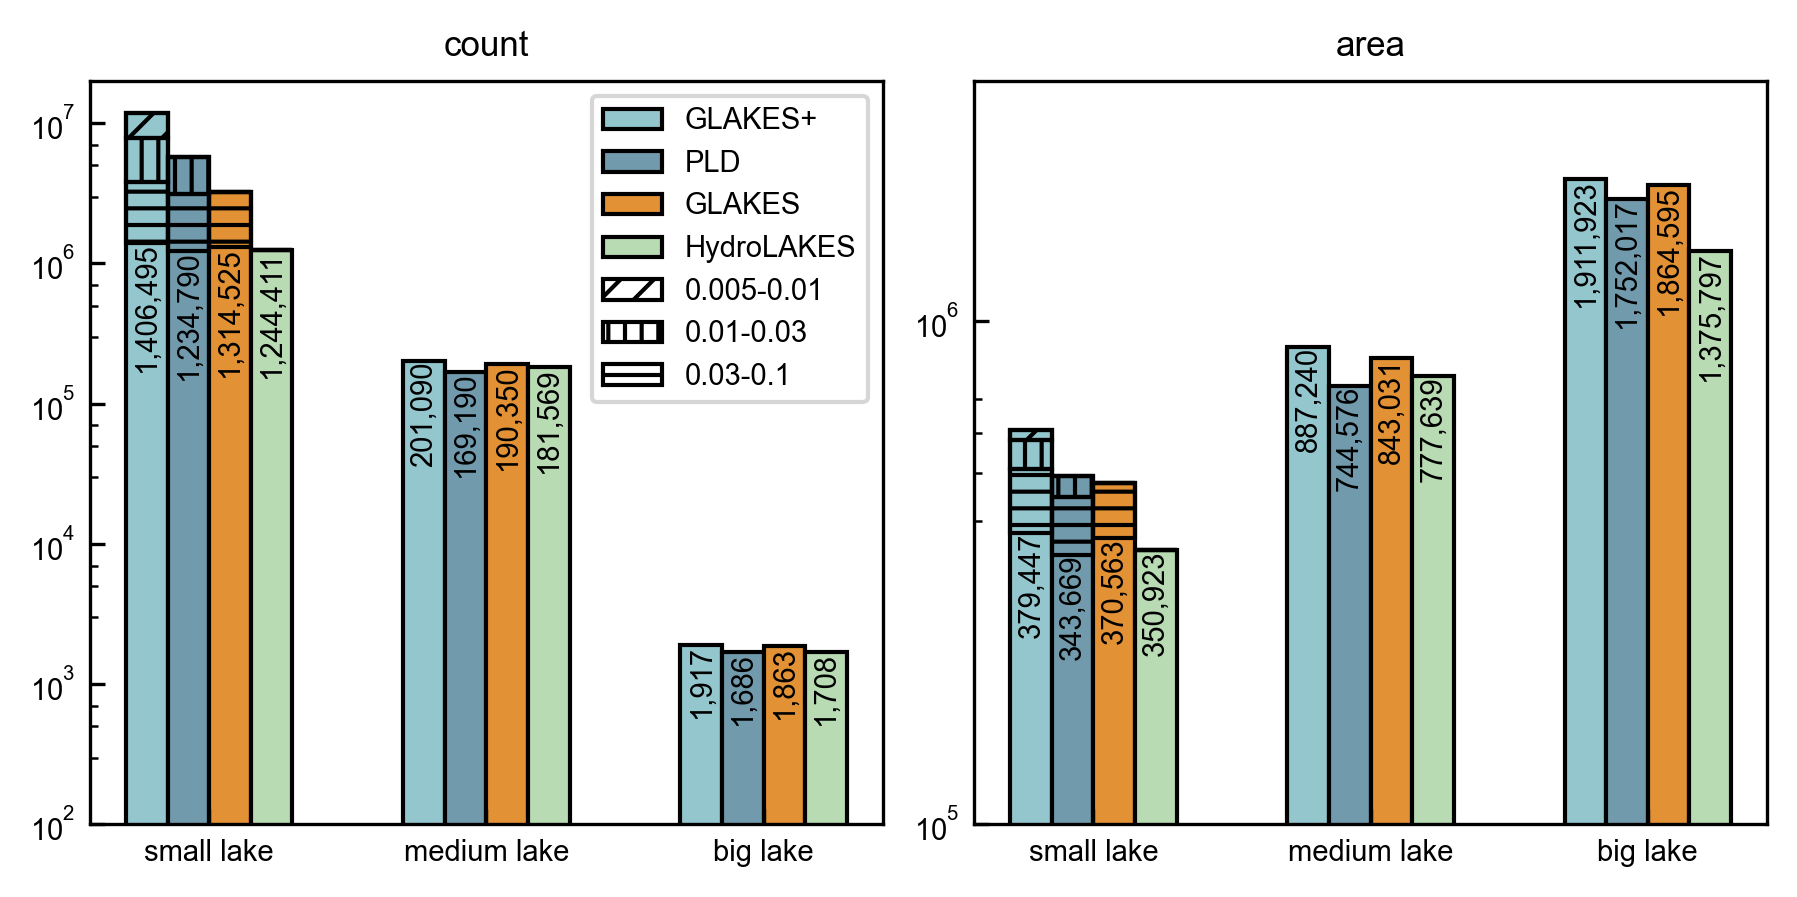

In [22]:
savepic=fig_path+'/several_datadsets_comparsion.eps'
fig, axes = plt.subplots(1, 2,figsize=(6, 3),dpi=300)
total_sheet_name_list=['datasets_count','datasets_area']
small_lake_sheet_name_list=['total_small_lake_count','total_small_lake_area']
subs=[[3,5,7],[4,5,6,7]]
c1=[4,2,3,0,1,5]
titles=['count','area']
for k in [0,1]:
    ax=axes[k]
    #读取总数据和小湖泊数据
    total_data = pd.read_excel(data_path, sheet_name=total_sheet_name_list[k])
    total_data=total_data.iloc[:,[0,2,3,5,6]]
    small_lake_data=pd.read_excel(data_path, sheet_name=small_lake_sheet_name_list[k])
    small_lake_data=small_lake_data.iloc[:,[0,2,3,5,6]]
    
    dataset_label = total_data.columns.tolist()[1:] # 各数据集的标签
    dataset_num=len(dataset_label)
    group_label = total_data['lake size group']
    small_lake_label = small_lake_data['lake size group']
    hatch=['///','|||','---']
    group_num=len(group_label)
    x = np.arange(group_num)  # 生成横坐标
    bar_width = 0.15  # 每个柱子的宽度
    offsets = np.linspace(-(dataset_num-1)*bar_width/2, (dataset_num-1)*bar_width/2, dataset_num)  # 每组的偏移量
    
    # 创建总的图表
    for i in range(dataset_num):
        bars=ax.bar(x + offsets[i], total_data[dataset_label[i]], bar_width, label=dataset_label[i], color=color_list_2[c1[i]], edgecolor='black')
        ## 给中、大湖泊添加标签
        for bar in bars[1:]:
            height=bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2,height - 1,  f'{int(height):,}',ha='center',va='top',rotation=90,color='black')
    
    # 绘制小湖泊中的子类别
    top=total_data.iloc[0,1:]##所有数据的小湖泊总数
    for i in range(len(small_lake_label)-1):
        height=small_lake_data.iloc[i,1:]
        bottom=top-height
        top=bottom
        bars=ax.bar(offsets,height=height, width=bar_width,bottom=bottom, color='none', edgecolor='black', hatch=hatch[i], label=small_lake_label[i])
    
    ## 添加小湖泊标签
    for bar in bars:
        height=bar.get_y()
        ax.text(bar.get_x() + bar.get_width() / 2,height - 1,  f'{int(height):,}',ha='center',va='top',rotation=90,color='black')
    
    ax.set_yscale("log",base=10,subs=subs[k])
    ax.set_xticks(x)
    ax.set_xticklabels(group_label,  ha='center')
    ax.set_title(titles[k])
    
    # # # 调整布局并显示
axes[0].set_ylim(100,20000000)
axes[1].set_ylim(100000,3000000)
axes[0].legend()

data = ['GLAKES+',
table = axes[1].table(cellText=data, colLabels=columns, loc='center')
plt.tight_layout()
plt.savefig(savepic,dpi=400)
plt.show()

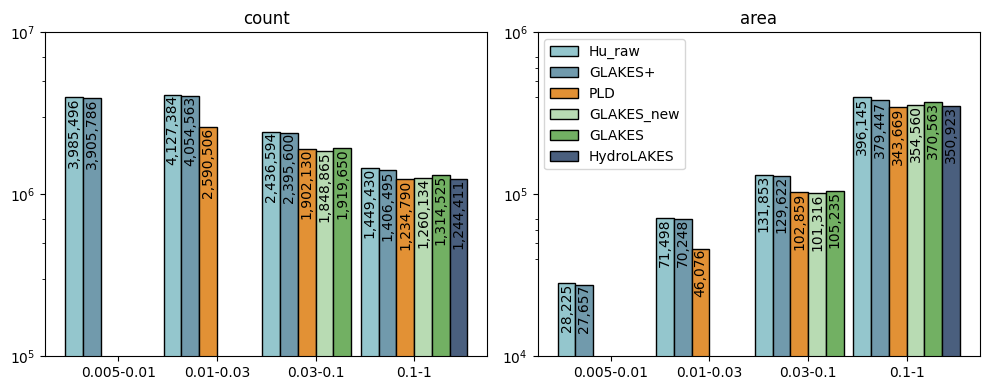

In [14]:
fig, axes = plt.subplots(1, 2,figsize=(10, 4))
small_lake_sheet_name_list=['total_small_lake_count','total_small_lake_area']
subs=[[3,5,7],[4,5,6,7]]
c1=[4,2,3,0,1,5]
titles=['count','area']
for k in [0,1]:
    ax=axes[k]
    #读取总数据和小湖泊数据
    small_lake_data=pd.read_excel(data_path, sheet_name=small_lake_sheet_name_list[k])
    
    dataset_label = small_lake_data.columns.tolist()[1:] # 各数据集的标签
    dataset_num=len(dataset_label)
    small_lake_label = small_lake_data['lake size group']
    hatch=['///','|||','---','++']
    group_num=len(small_lake_label)
    x = np.arange(group_num)  # 生成横坐标
    bar_width = 0.18  # 每个柱子的宽度
    offsets = np.linspace(-(dataset_num-1)*bar_width/2, (dataset_num-1)*bar_width/2, dataset_num)  # 每组的偏移量
    
    for i in range(dataset_num):
        bars=ax.bar(x + offsets[i], small_lake_data[dataset_label[i]], bar_width, label=dataset_label[i], color=color_list_2[c1[i]], edgecolor='black')
        for bar in bars:
            height=bar.get_height()
            if height !=0:
                ax.text(bar.get_x() + bar.get_width() / 2,height - 100,  f'{int(height):,}',ha='center',va='top',rotation=90,color='black')
    
    ax.set_yscale("log",base=10,subs=subs[k])
    ax.set_xticks(x)
    ax.set_xticklabels(small_lake_label,  ha='center')
    ax.set_title(titles[k])
    
    # # # 调整布局并显示
axes[0].set_ylim(100000,10000000)
axes[1].set_ylim(10000,1000000)
axes[1].legend()
plt.tight_layout()
plt.show()

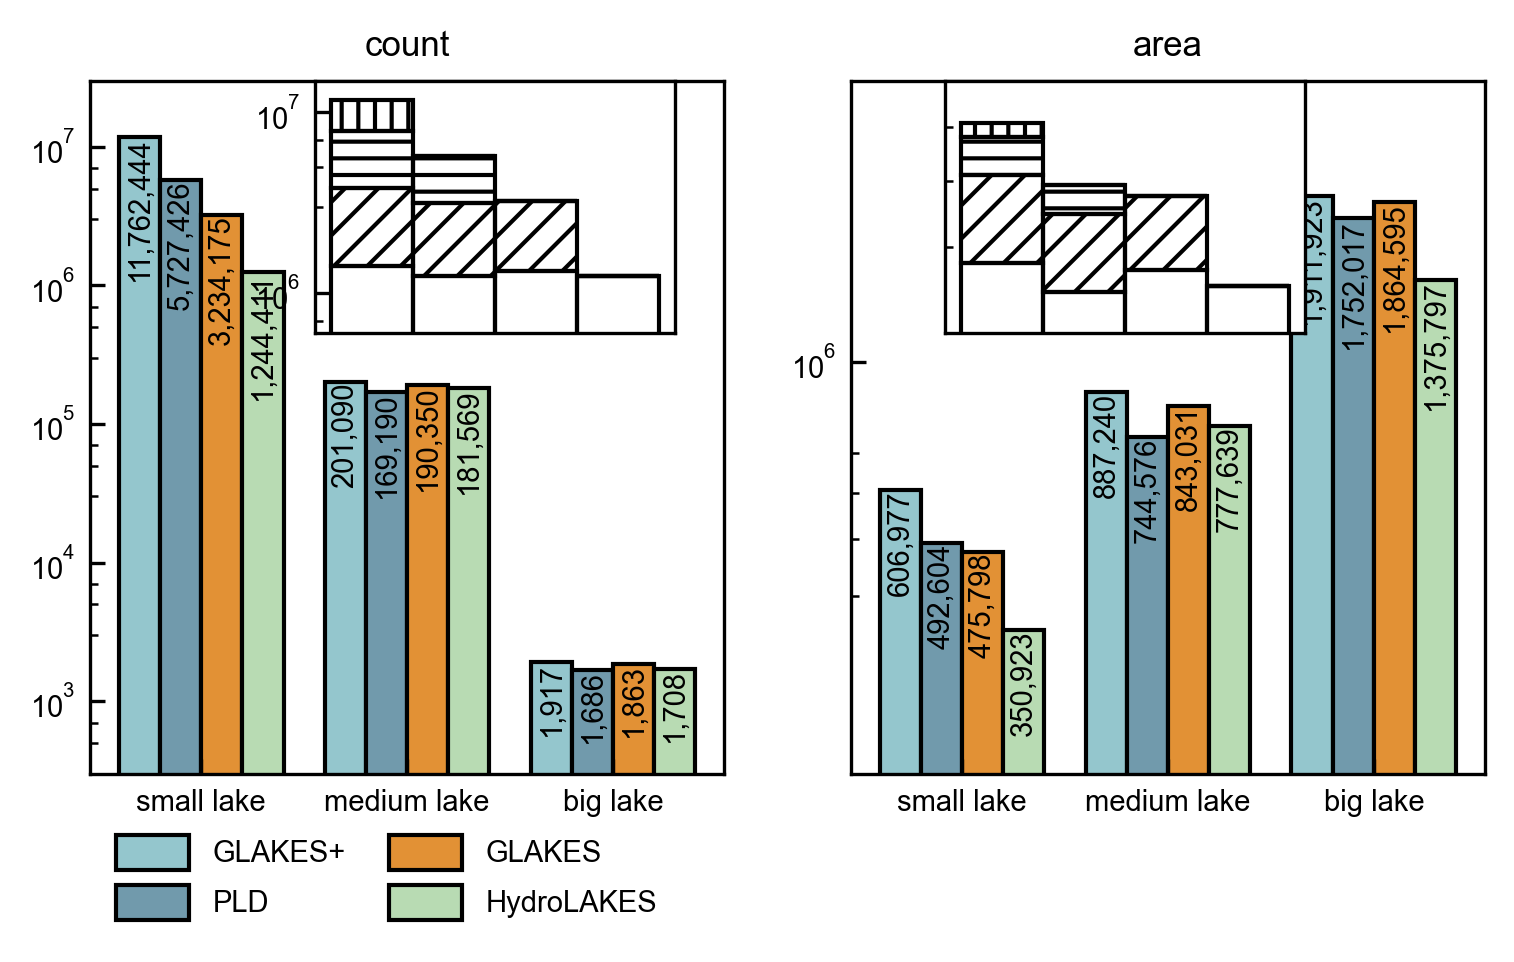

In [167]:
fig, axes = plt.subplots(1, 2,figsize=(6, 3),dpi=300)
total_sheet_name_list=['datasets_count','datasets_area']
small_lake_sheet_name_list=['total_small_lake_count','total_small_lake_area']
subs=[[3,5,7],[4,5,6,7]]
c1=[4,2,3,0,1,5]
titles=['count','area']
ax1=fig.add_axes([0.25,0.6,0.2,0.28])
ax2=fig.add_axes([0.6,0.6,0.2,0.28])
small_lake_axes=[ax1,ax2]
hatch=['|||','---','///','']
scale=100000
for k in [0,1]:
    ax=axes[k]
    #读取总数据和小湖泊数据
    total_data = pd.read_excel(data_path, sheet_name=total_sheet_name_list[k])
    small_lake_data=pd.read_excel(data_path, sheet_name=small_lake_sheet_name_list[k])
    total_data=total_data.iloc[:,[0,2,3,5,6]]
    small_lake_data=small_lake_data.iloc[:,[0,2,3,5,6]]
    dataset_label = total_data.columns.tolist()[1:] # 各数据集的标签
    dataset_num=len(dataset_label)
    group_label = total_data['lake size group']
    small_lake_label = small_lake_data['lake size group']
    group_num=len(group_label)
    x = np.arange(group_num)  # 生成横坐标
    bar_width = 0.2  # 每个柱子的宽度
    offsets = np.linspace(-(dataset_num-1)*bar_width/2, (dataset_num-1)*bar_width/2, dataset_num)  # 每组的偏移量
    
    # 创建总的图表
    for i in range(dataset_num):
        bars=ax.bar(x + offsets[i], total_data[dataset_label[i]], bar_width, label=dataset_label[i], color=color_list_2[c1[i]], edgecolor='black')
        for bar in bars:
            height=bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2,height - 1,  f'{int(height):,}',ha='center',va='top',rotation=90,color='black')
        
    ax.set_yscale("log",base=10,subs=subs[k])
    ax.set_xticks(x)
    ax.set_xticklabels(group_label,  ha='center')
    ax.set_title(titles[k])
    sm_ax=small_lake_axes[k]
    # 绘制小湖泊中的子类别
    top=total_data.iloc[0,1:]#/scale##所有数据的小湖泊总数
    for i in range(len(small_lake_label)):
        height=small_lake_data.iloc[i,1:]#/scale
        bottom=top-height
        top=bottom
        bars=sm_ax.bar(offsets,height=height, width=bar_width,bottom=bottom, color='none', edgecolor='black', hatch=hatch[i], label=small_lake_label[i])
    sm_ax.set_xticks(offsets)
    sm_ax.set_yscale("log",base=10,subs=subs[k])
    sm_ax.tick_params(axis='both', which='both', bottom=False, top=False, left=True, right=False, labelbottom=False, labelleft=True)
#     sm_ax.set_xticklabels(dataset_label, ha='center')
    # # # 调整布局并显示
axes[0].set_ylim(300,300*scale)
axes[1].set_ylim(2*scale,30*scale)
ax1.set_ylim(6*scale,150*scale)
ax2.set_ylim(3*scale,7*scale)
# axes[0].legend(loc='upper right', bbox_to_anchor=(1, 0.6))
axes[0].legend(loc='upper left', bbox_to_anchor=(0, -0.05), ncol=2, frameon=False, 
         handlelength=2.5, columnspacing=1.5, handleheight=1.5)
# plt.tight_layout()
plt.show()

In [192]:
## log size group
## small lakes <1 km2 tiny lakes <0.01km2,or 100ha
## medium lakes 1~100
## big lakes 100~10000
## super big lakes >10000
### exclude Captial sea
bins=[0.005,0.01,1,100,10000,1000000]
labels=['Tiny','Small','Medium','Large','Super large']

In [193]:
count = pd.read_excel(data_path, sheet_name='count')
count['lake category'] = pd.cut(count['upper bound'], bins=bins, labels=labels)
count
count_summary = count.groupby('lake category').sum()
count_summary=gpd.GeoDataFrame(count_summary).reset_index()
count_summary

,lake category,upper bound,GLAKES+,PLD,GLAKES,HydroLAKES
0,Tiny,0.01,3905786,0,0,0
1,Small,1.10,7856658,3825296,3234175,1244411
2,Medium,110.00,201090,169190,190350,181569
3,Large,11000.00,1901,1670,1847,1690
4,Super large,1100000.00,16,16,15,17


In [194]:
area = pd.read_excel(data_path, sheet_name='area')
area['lake category'] = pd.cut(count['upper bound'], bins=bins, labels=labels)
area_summary = area.groupby('lake category').sum()
area_summary=gpd.GeoDataFrame(area_summary).reset_index()
area_summary

,lake category,upper bound,GLAKES+,PLD,GLAKES,HydroLAKES
0,Tiny,0.01,27657.964570,0.000000,0.000000,0.000000
1,Small,1.10,579319.322800,492604.785338,475798.673284,350923.609887
2,Medium,110.00,887240.979700,744576.136885,843031.665466,802493.659897
3,Large,11000.00,946837.102900,834603.835178,899277.009162,814159.558945
4,Super large,1100000.00,586702.528629,544187.643989,587775.664306,582144.027344


In [195]:
dataset_label = area_summary.columns.tolist()[2:] # 各数据集的标签
dataset_num=len(dataset_label)
dataset_label

['GLAKES+', 'PLD', 'GLAKES', 'HydroLAKES']

In [196]:
lake_category_label = labels[1:]
lake_category_num=len(lake_category_label)
lake_category_label

['Small', 'Medium', 'Large', 'Super large']

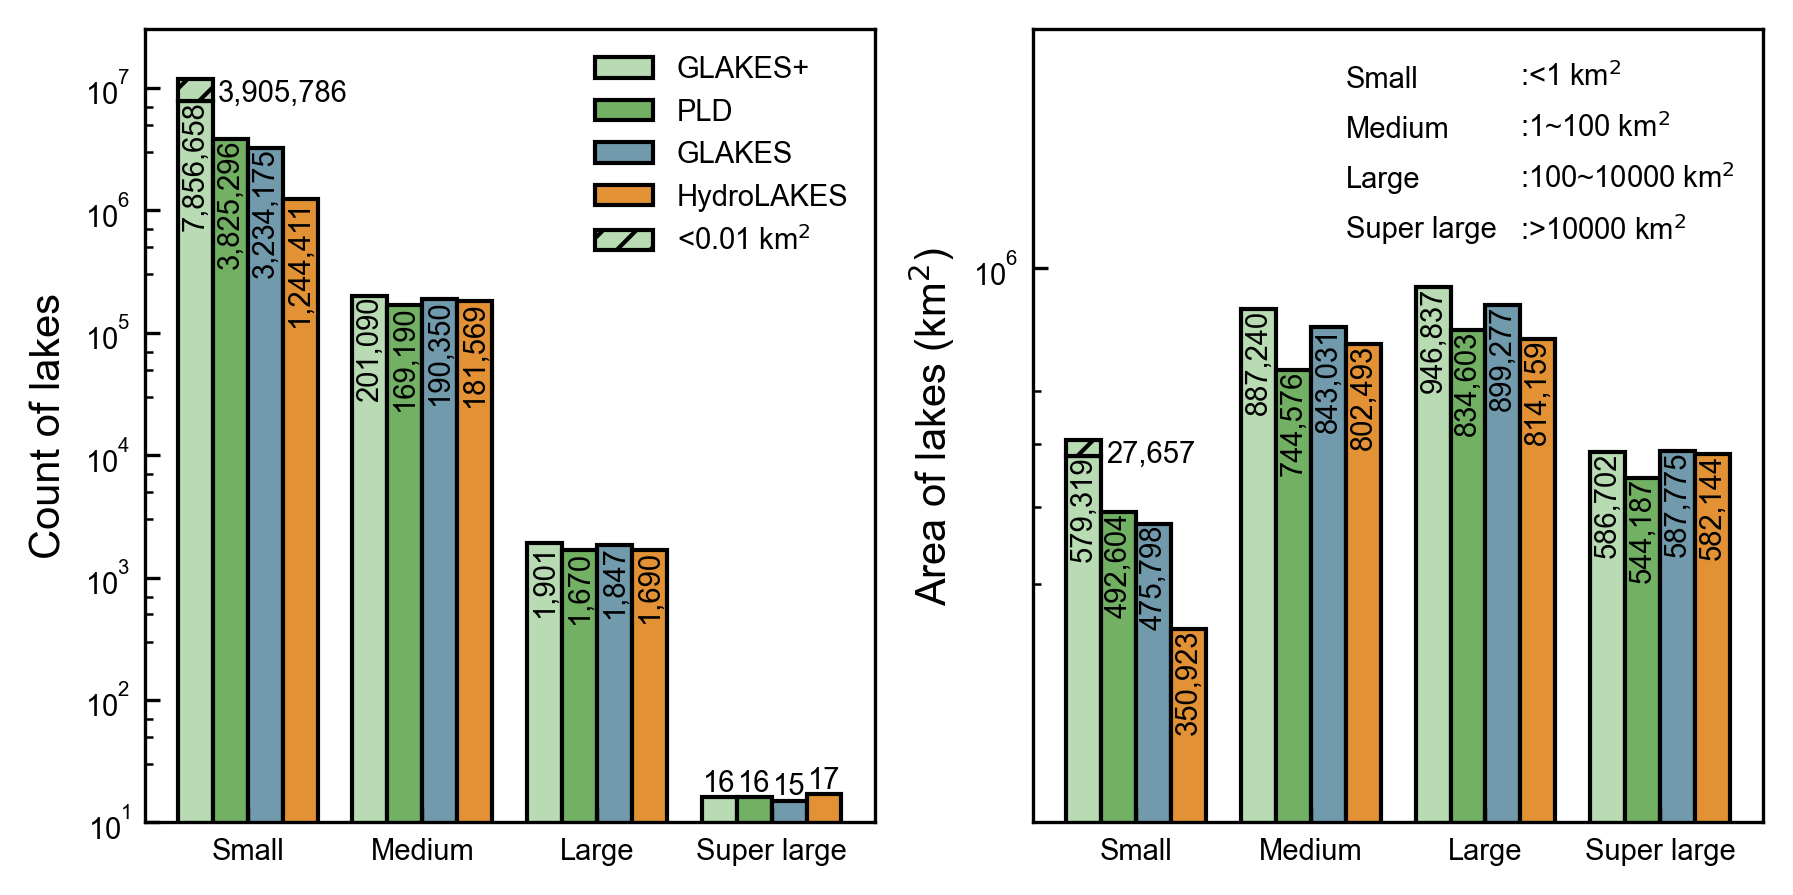

In [244]:
# savepic=fig_path+'/several_datadsets_comparsion.eps'
savepic=fig_path+'/5_several_datadsets_comparsion.png'
fig, axes = plt.subplots(1, 2,figsize=(6, 3),dpi=300)
titles=['Count of lakes','Area of lakes (km$^2$)']
for k in [0,1]:
    if k==0:
        total_data=count_summary
    else:
        total_data=area_summary
    ax=axes[k]
    x = np.arange(lake_category_num)  # 生成横坐标
    bar_width = 0.2  # 每个柱子的宽度
    offsets = np.linspace(-(dataset_num-1)*bar_width/2, (dataset_num-1)*bar_width/2, dataset_num)  # 每组的偏移量
#     print(total_data[dataset_label[i]])
    # 创建总的图表
    for i in range(dataset_num):
        bars=ax.bar(x + offsets[i], total_data[dataset_label[i]].iloc[1:], bar_width, label=dataset_label[i], color=color_list_2[i], edgecolor='black')
        for bar in bars:
            height=bar.get_height()
            if height>20:
                ax.text(bar.get_x() + bar_width / 2,height - 1,  f'{int(height):,}',ha='center',va='top',rotation=90,color='black')
            else:
                ax.text(bar.get_x() + bar_width / 2,height,  f'{int(height):,}',ha='center',va='bottom',rotation=0,color='black')
    
    height=total_data['GLAKES+'].iloc[0]#/scale
    bottom=total_data['GLAKES+'].iloc[1]
    bars=ax.bar(offsets[0],height=height, width=bar_width,bottom=bottom, color=color_list_2[0], edgecolor='black', hatch='///', label='<0.01 km$^2$')
    ax.text(offsets[0] + bar_width / 2+0.03, bottom+height,  f'{int(height):,}',ha='left',va='top',rotation=0,color='black')    
    ax.set_yscale("log",base=10,subs=subs[k])
    ax.set_xticks(x)
    ax.set_xticklabels(lake_category_label,  ha='center')
    ax.set_ylabel(titles[k],fontsize=10)
    
    # # # 调整布局并显示
scale=100000
axes[0].set_ylim(10,300*scale)
axes[1].set_ylim(2*scale,20*scale)
axes[0].legend(loc='upper right', frameon=False)

strs=''
size_str=''
for i in range(lake_category_num):
    if i==0:
        strs=strs+f'{lake_category_label[i]}\n'
        size_str=size_str+f':<{bins[2+i]} km$^2$\n'
    elif i<lake_category_num-1:
        strs=strs+f'{lake_category_label[i]}\n'
        size_str=size_str+f':{bins[1+i]}~{bins[2+i]} km$^2$\n'
    else:
        strs=strs+f'{lake_category_label[i]}\n'
        size_str=size_str+f':>{bins[1+i]} km$^2$\n'
# axes[1].text(-0.4,11*scale,strs)
# axes[1].text(0.5,11*scale,size_str)
axes[1].text(1.2, 9.3*scale, strs,linespacing=2,va='bottom', ha='left')
axes[1].text(2.2, 9.3*scale, size_str,linespacing=1.9,va='bottom', ha='left')
plt.tight_layout()
plt.savefig(savepic,dpi=400)
plt.show()

In [74]:
print(x)

[0 1 2 3]
